# Task-1 Prediction using Supervised ML
Predict the percentage of marks of a student based on the number of study hours.

# Importing required library

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Accessing Data

In [3]:
data = pd.read_csv('http://bit.ly/w-data')
print('Shape of the dataset is: ', data.shape)
data

Shape of the dataset is:  (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# Checking for any missing values:

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
# Finding correlation among the data infact this data set is very small

correlation= data.corr(method='pearson')
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


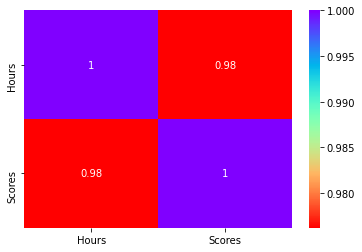

In [8]:
sns.heatmap(correlation, annot=True, cmap='rainbow_r');

In [9]:
# Creating two variables X and y to hold hour and score values:

X = data.iloc[:, :1].values
y = data.iloc[:, 1].values

In [10]:
# Creating a train test:

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Data Visualization

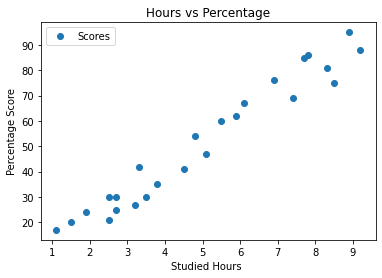

In [11]:
#Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Studied Hours ') 
plt.ylabel('Percentage Score') 
plt.show()

# Linear Regression

In [12]:
def mean(list):
    return float(sum(list))/len(list)

def slope(X_train, y_train, X_mean, y_mean):
    return sum((X_train - X_mean) * (y_train - y_mean))/sum((X_train - X_mean) ** 2)

def intercept(X_mean, y_mean, m):
    return y_mean - m * X_mean

In [13]:
X_mean = mean(X_train)
y_mean = mean(y_train)
m = slope(X_train[:, 0], y_train, X_mean, y_mean)
b = intercept(X_mean, y_mean, m)
print('Slope, m: ', m)
print('Intercept, b: ', b)

Slope, m:  9.682078154455699
Intercept, b:  2.826892353899737


# Training the model

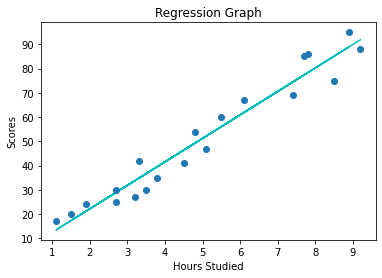

In [14]:
# Plotting the regression line
plt.plot(X_train, X_train * m + b, 'c')

# Plotting the data points from training set
plt.plot(X_train, y_train, 'o')
plt.title('Regression Graph')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print ("Slope: ", regressor.coef_[0])
print ("Intercept: ", regressor.intercept_)

Slope:  9.682078154455699
Intercept:  2.82689235389973


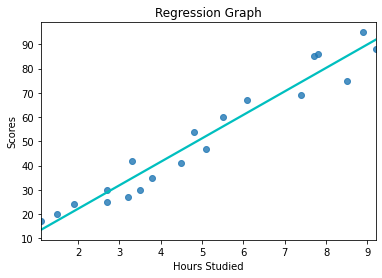

In [16]:
sns.regplot(X_train, y_train, ci = None, line_kws={'color':'c'})
plt.title('Regression Graph')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

In [17]:
print('The error between slope of our model and scikit-learn\'s model: ', abs(regressor.coef_[0] - m))
print('The error between intercept of our model and scikit-learn\'s model: ', abs(regressor.intercept_ - b))

The error between slope of our model and scikit-learn's model:  0.0
The error between intercept of our model and scikit-learn's model:  7.105427357601002e-15


In [18]:
y_pred = regressor.predict(X_test)

# Making Prediction

In [19]:
df = pd.DataFrame({'Hours': X_test[:,0], 'Actual Score': y_test, 'Predicted Score': y_pred})  
df

,Hours,Actual Score,Predicted Score
0,8.3,81,83.188141
1,2.5,30,27.032088
2,2.5,21,27.032088
3,6.9,76,69.633232
4,5.9,62,59.951153


In [20]:
# Checking model for an arbitary data as input:

print('Number of hours: 9.65')
print('Predicted score: ', regressor.predict([[9.65]])[0])

Number of hours: 9.65
Predicted score:  96.25894654439722


# Evaluating model accuracy:

In [21]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Value:', metrics.r2_score(y_test, y_pred))

print("The model has an accuracy of",metrics.r2_score(y_test, y_pred)*100,"%")

Mean Absolute Error: 3.920751190209927
Root Mean Squared Error: 4.352380006653289
R2 Value: 0.9678055545167993
The model has an accuracy of 96.78055545167993 %


The model has an accuracy of 96.78%